In [6]:
import glob
import matplotlib.pyplot as plt
import os
import re

In [7]:
root_path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
log_path = os.path.join(root_path, 'log')
log_prefix = 'lockfree-nohotspot-skiplist'
log_file_names = glob.glob(log_path + f"/{log_prefix}-*.log")
name_pattern = re.compile(rf".+{log_prefix}-n\d+-i(\d+)-u\d+\.\d+\.log")
log_pattern = re.compile(r"Thread \d+: range query from (\d+) to (\d+) found (\d+) values, took (\d+) ms")

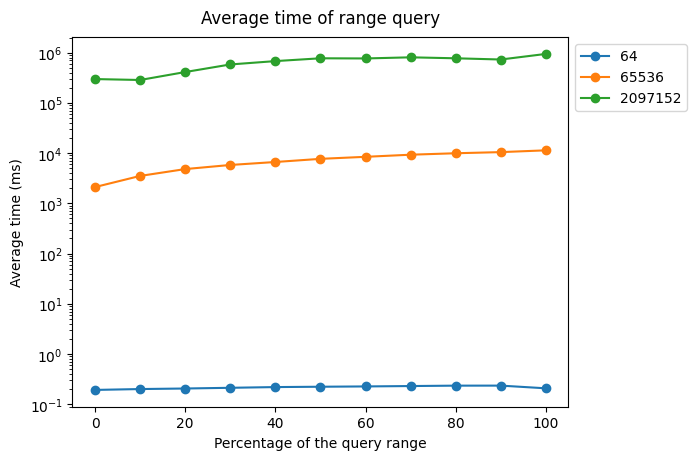

In [19]:
set_dict = dict()

x = [i * 10 for i in range(0, 11)]
ys = []

for log_file in log_file_names:
  match = name_pattern.match(log_file)
  if match:
    i = float(match.group(1))
    if i not in set_dict:
      set_dict[i] = {
        "query_count": [0 for _ in range(0, 11)],
        "time_acc": [0 for _ in range(0, 11)]
      }
  else:
    continue
  
  with open(log_file, 'r') as f:
    lines = f.readlines()
    for line in lines:
      if (line.startswith('Thread ')):
        m = log_pattern.match(line)
        if m:
          start = int(m.group(1))
          end = int(m.group(2))
          count = int(m.group(3))
          time = int(m.group(4))
          p = float(end - start + 1) / i * 100
          idx = int(p / 10.0)
          set_dict[i]['query_count'][idx] += 1
          set_dict[i]['time_acc'][idx] += time

for key, val in set_dict.items():
  for i in range(0, 11):
    if (val['query_count'][i] == 0):
      continue
    val['time_acc'][i] /= val['query_count'][i]

for key, val in set_dict.items():
  ys.append((key, val['time_acc']))

for (key, y) in ys:
  plt.plot(x, y, 'o-', label=f"{int(key)}")
  
plt.xlabel('Percentage of the query range')
plt.ylabel('Average time (ms)')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Average time of range query', pad=10)
plt.show()